References for the Hopkins Test:<br>https://www.kaggle.com/code/lachhebo/hopkins-test/notebook <br>https://pyclustertend.readthedocs.io/en/master/<br>
References for K-means:<br>https://www.statology.org/k-means-clustering-in-python/

## Installations and Imports

In [5]:
#pip install pandas
#pip install pyclustertend
#pip install numpy
#pip install seaborn
#pip install numba==0.54.1
#pip install numpy==1.20.3
#numba==0.54.1 numpy==1.21

In [9]:
#pip install pandas pyclustertend seaborn numba numpy

In [2]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# Hopkins Score
from pyclustertend import hopkins

# For plots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

# K-Means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# K-Means evaluation
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# KNN
from sklearn.model_selection import train_test_split
from scipy import stats
import time
from sklearn.neighbors import KNeighborsClassifier

# Agglomerative
from sklearn.cluster import AgglomerativeClustering

## 1. Definition of the Dataframes

In [3]:
df_generalROI = pd.read_csv('./data/FRC_General_ROI_values.tsv', sep='\t')

In [4]:
df_generalROI.head()

,Study level 1,Study level 2,Study level 3,Study level 4,Study level 5,Name,Image,LayerData,Centroid definition APP,NFT Centroid X,NFT Centroid Y,NP Centroid X,NP Centroid Y
0,VIS DATABASE,Haik-Potier,Haik-Potier_TAU-objects-distribution_Mathilde,01 General ROI,01 FRC complete GM,rpAD_A1702073,D:\PROJECT DATA\Haik-Potier_AI-plaques-tangles...,D:\VIS_MetaData\d0\e0234\ses1406_100593_Result...,PROJECT APPs\Haik-Potier_TAU object distributi...,13108.939843,7890.448858,11140.435865,5007.713429
1,VIS DATABASE,Haik-Potier,Haik-Potier_TAU-objects-distribution_Mathilde,01 General ROI,01 FRC complete GM,rpAD_A1702073,D:\PROJECT DATA\Haik-Potier_AI-plaques-tangles...,D:\VIS_MetaData\d0\e0234\ses1406_100593_Result...,PROJECT APPs\Haik-Potier_TAU object distributi...,14169.277829,7886.467790,9362.589238,4481.327797
2,VIS DATABASE,Haik-Potier,Haik-Potier_TAU-objects-distribution_Mathilde,01 General ROI,01 FRC complete GM,rpAD_A1702073,D:\PROJECT DATA\Haik-Potier_AI-plaques-tangles...,D:\VIS_MetaData\d0\e0234\ses1406_100593_Result...,PROJECT APPs\Haik-Potier_TAU object distributi...,14194.050013,6989.400512,9876.612074,4777.696178
3,VIS DATABASE,Haik-Potier,Haik-Potier_TAU-objects-distribution_Mathilde,01 General ROI,01 FRC complete GM,rpAD_A1702073,D:\PROJECT DATA\Haik-Potier_AI-plaques-tangles...,D:\VIS_MetaData\d0\e0234\ses1406_100593_Result...,PROJECT APPs\Haik-Potier_TAU object distributi...,13047.009381,6753.632830,11222.714907,4558.737449
4,VIS DATABASE,Haik-Potier,Haik-Potier_TAU-objects-distribution_Mathilde,01 General ROI,01 FRC complete GM,rpAD_A1702073,D:\PROJECT DATA\Haik-Potier_AI-plaques-tangles...,D:\VIS_MetaData\d0\e0234\ses1406_100593_Result...,PROJECT APPs\Haik-Potier_TAU object distributi...,14525.377986,6151.164570,8579.168891,4090.298471


We create 2 dataframes: one for the NFT and one for the NP.

### 1.1 NFT Dataframe

In [279]:
df_NFT = df_generalROI[['Name','NFT Centroid X','NFT Centroid Y']].copy()
#df_NFT = df_NFT.set_index('Name')
#df_NFT.to_csv('NFT_x_y.csv')
df_NFT.head()

,NFT Centroid X,NFT Centroid Y
Name,,
rpAD_A1702073,13108.939843,7890.448858
rpAD_A1702073,14169.277829,7886.467790
rpAD_A1702073,14194.050013,6989.400512
rpAD_A1702073,13047.009381,6753.632830
rpAD_A1702073,14525.377986,6151.164570


In [6]:
# How many NaN values do we have?
df_NFT.isna().sum().sum()

4

### 1.2 NP Dataframe

In [278]:
df_NP = df_generalROI[['Name','NP Centroid X','NP Centroid Y']].copy()
#df_NP = df_NP.set_index('Name')
#df_NP.to_csv('NP_x_y.csv')
df_NP.head()

,NP Centroid X,NP Centroid Y
Name,,
rpAD_A1702073,11140.435865,5007.713429
rpAD_A1702073,9362.589238,4481.327797
rpAD_A1702073,9876.612074,4777.696178
rpAD_A1702073,11222.714907,4558.737449
rpAD_A1702073,8579.168891,4090.298471


In [8]:
# How many NaN values do we have?
df_NP.isna().sum().sum()

22618

## 2. Hopkins Test on all slides

Let's create special dataframes for the Hopkins Test (without the 'Name' column)

### 2.1 NFT

In [9]:
df_NFT_H = df_generalROI[['NFT Centroid X','NFT Centroid Y']].copy()
df_NFT_H.head()

,NFT Centroid X,NFT Centroid Y
0,13108.939843,7890.448858
1,14169.277829,7886.467790
2,14194.050013,6989.400512
3,13047.009381,6753.632830
4,14525.377986,6151.164570


In [10]:
# We drop the NaN values
df_NFT_H_clean = df_NFT_H.dropna()
# We check if it worked
df_NFT_H_clean.isna().sum().sum()

0

In [11]:
# Hopkins Test for the NFT Dataset
NFT_Hopkins = hopkins(scale(df_NFT_H_clean),df_NFT_H_clean.shape[0])
print('Hopkins Test for the NFT Dataset =', NFT_Hopkins)

Hopkins Test for the NFT Dataset = 0.10482033669870834


Let's plot the global distribution of all NFTs

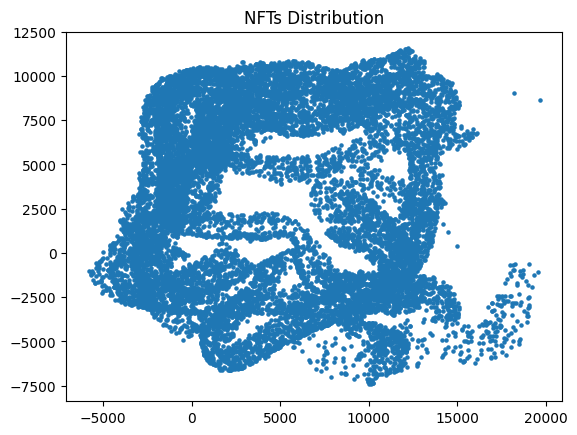

In [12]:
x_NFT = df_NFT_H_clean[['NFT Centroid X']]
y_NFT = df_NFT_H_clean[['NFT Centroid Y']]
plt.title('NFTs Distribution')
plt.scatter(x_NFT, y_NFT, s = 5);

### 2.2 NP

In [13]:
df_NP_H = df_generalROI[['NP Centroid X','NP Centroid Y']].copy()
df_NP_H.head()

,NP Centroid X,NP Centroid Y
0,11140.435865,5007.713429
1,9362.589238,4481.327797
2,9876.612074,4777.696178
3,11222.714907,4558.737449
4,8579.168891,4090.298471


Drop the NaN values

In [14]:
# We drop the NaN values
df_NP_H_clean = df_NP_H.dropna()
# We check if it worked
df_NP_H_clean.isna().sum().sum()

0

In [15]:
# Hopkins Test for the NP Dataset
NP_Hopkins = hopkins(scale(df_NP_H_clean),df_NP_H_clean.shape[0])
print('Hopkins Test for the NP Dataset =', NP_Hopkins)

Hopkins Test for the NP Dataset = 0.16287313000658235


Let's plot the global distribution of all NPs

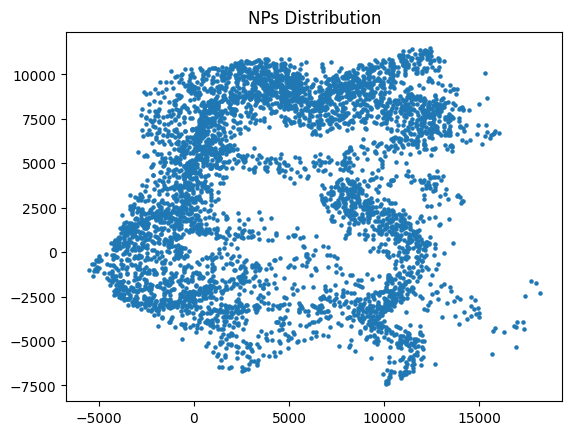

In [16]:
x_NP = df_NP_H_clean[['NP Centroid X']]
y_NP = df_NP_H_clean[['NP Centroid Y']]
plt.title('NPs Distribution')
plt.scatter(x_NP, y_NP, s = 5);

### 2.3 Conclusion

The null hypothesis (no meaningfull cluster) happens when the hopkins test is around 0.5 and the hopkins test tends to 0 when meaningful cluster exists in the space. Usually, we can believe in the existence of clusters when the hopkins score is bellow 0.25.<br>
Here we have a hopkins score of 0.10 for NFTs and 0.16 for NPs. This means that our data have a high cluster tendency.

However, this cluster tendency is applied to all slides at once. It is a global tendency.<br>Now we can see if we keep this cluster tendency slide by slide.

## 3. Hopkins Test slide by slide

### 3.1 NFT

Let's clean our NFT dataset

In [17]:
df_NFT_clean = df_NFT.dropna()
# We check if it worked
df_NFT_clean.isna().sum().sum()

0

Define the patient ID as index

In [18]:
df_NFT_nameID = df_NFT_clean.set_index('Name')
df_NFT_nameID.head()

,NFT Centroid X,NFT Centroid Y
Name,,
rpAD_A1702073,13108.939843,7890.448858
rpAD_A1702073,14169.277829,7886.467790
rpAD_A1702073,14194.050013,6989.400512
rpAD_A1702073,13047.009381,6753.632830
rpAD_A1702073,14525.377986,6151.164570


Get unique names

In [19]:
names = df_NFT_nameID.index.unique()
names

Index(['rpAD_A1702073', 'rpAD_A1702076', 'rpAD_A1702114', 'rpAD_A1702121',
       'rpAD_A1702126', 'cAD_A1702862', 'cAD_A1703171', 'cAD_A1800589',
       'cAD_A1800590', 'cAD_A1800592', 'cAD_A1800594', 'cAD_A1800595',
       'cAD_A1800596'],
      dtype='object', name='Name')

Create a dictionary of dataframes, one for each unique name

In [20]:
dfs_NFT = {name: df_NFT_nameID[df_NFT_nameID.index == name] for name in names}
#dfs_NFT

Now we can apply the Hopkins Test for each slide/patient

In [21]:
l_Hopkins_NFT = list()
for name, new_df_NFT in dfs_NFT.items():
    Hopkins_NFT = hopkins(scale(new_df_NFT),new_df_NFT.shape[0])
    l_Hopkins_NFT.append(Hopkins_NFT)
    print('Hopkins Test for the',name,'NFT dataset =', Hopkins_NFT)

Hopkins Test for the rpAD_A1702073 NFT dataset = 0.36466036378623246
Hopkins Test for the rpAD_A1702076 NFT dataset = 0.1419846787862371
Hopkins Test for the rpAD_A1702114 NFT dataset = 0.08336217830777595
Hopkins Test for the rpAD_A1702121 NFT dataset = 0.06848976382547134
Hopkins Test for the rpAD_A1702126 NFT dataset = 0.1609250813424646
Hopkins Test for the cAD_A1702862 NFT dataset = 0.05774307233975835
Hopkins Test for the cAD_A1703171 NFT dataset = 0.08667660809248032
Hopkins Test for the cAD_A1800589 NFT dataset = 0.07012767990318577
Hopkins Test for the cAD_A1800590 NFT dataset = 0.0648078678519899
Hopkins Test for the cAD_A1800592 NFT dataset = 0.03577161074915172
Hopkins Test for the cAD_A1800594 NFT dataset = 0.04090400289393455
Hopkins Test for the cAD_A1800595 NFT dataset = 0.2940617047403987
Hopkins Test for the cAD_A1800596 NFT dataset = 0.20341407299865596


In conclusion, we can see that in one hand some slides have a high NFT cluster tendency (rpAD_A1702114, rpAD_A1702121, cAD_A1800592 for example) but in an other hand, some tend a little bit less to this tendency (rpAD_A1702073, cAD_A1800595). Let's compare the NFT distribution for visual support.

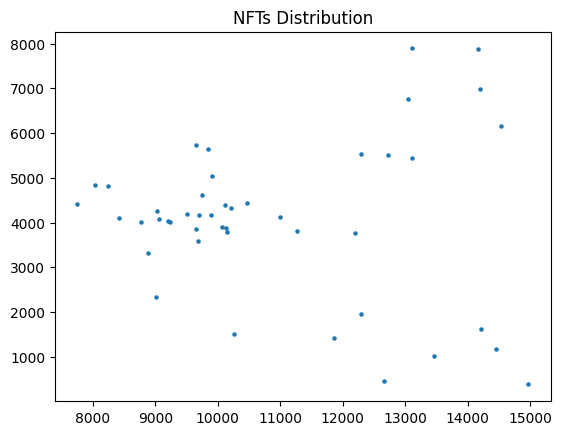

In [22]:
# rpAD_A1702073 (Less clusterable) 0.39
x_NFT_rpAD_A1702073 = dfs_NFT['rpAD_A1702073'][['NFT Centroid X']]
y_NFT_rpAD_A1702073 = dfs_NFT['rpAD_A1702073'][['NFT Centroid Y']]
plt.title('NFTs Distribution')
plt.scatter(x_NFT_rpAD_A1702073, y_NFT_rpAD_A1702073, s = 5);

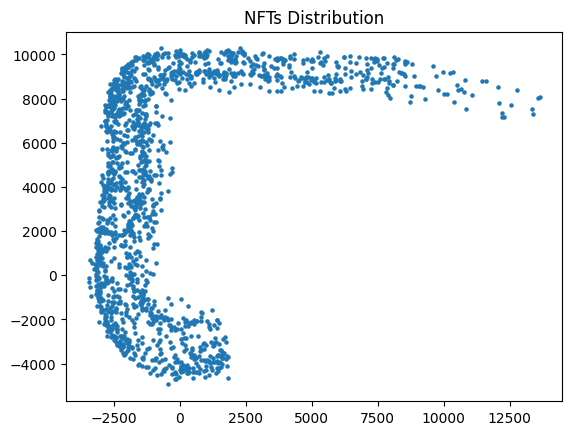

In [23]:
# cAD_A1800592 (Highly clusterable)
x_NFT_cAD_A1800592 = dfs_NFT['cAD_A1800592'][['NFT Centroid X']]
y_NFT_cAD_A1800592 = dfs_NFT['cAD_A1800592'][['NFT Centroid Y']]
plt.title('NFTs Distribution')
plt.scatter(x_NFT_cAD_A1800592, y_NFT_cAD_A1800592, s = 5);

### 3.2 NP

Now we can do the same for the NPs

In [24]:
df_NP_clean = df_NP.dropna()
# We check if it worked
df_NP_clean.isna().sum().sum()

0

In [282]:
df_NP_nameID = df_NP_clean.set_index('Name')
df_NP_nameID.head(50)

,NP Centroid X,NP Centroid Y
Name,,
rpAD_A1702073,11140.435865,5007.713429
rpAD_A1702073,9362.589238,4481.327797
rpAD_A1702073,9876.612074,4777.696178
rpAD_A1702073,11222.714907,4558.737449
rpAD_A1702073,8579.168891,4090.298471
rpAD_A1702073,8393.377504,3961.577279
rpAD_A1702073,8921.113514,4023.062659
rpAD_A1702073,9570.941007,4257.503319
rpAD_A1702073,9314.371949,4130.109149


In [26]:
names = df_NP_nameID.index.unique()
names

Index(['rpAD_A1702073', 'rpAD_A1702076', 'rpAD_A1702114', 'rpAD_A1702121',
       'rpAD_A1702126', 'cAD_A1702862', 'cAD_A1703171', 'cAD_A1800589',
       'cAD_A1800590', 'cAD_A1800592', 'cAD_A1800594', 'cAD_A1800595',
       'cAD_A1800596'],
      dtype='object', name='Name')

In [27]:
dfs_NP = {name: df_NP_nameID[df_NP_nameID.index == name] for name in names}
dfs_NP

{'rpAD_A1702073':                NP Centroid X  NP Centroid Y
 Name                                       
 rpAD_A1702073   11140.435865    5007.713429
 rpAD_A1702073    9362.589238    4481.327797
 rpAD_A1702073    9876.612074    4777.696178
 rpAD_A1702073   11222.714907    4558.737449
 rpAD_A1702073    8579.168891    4090.298471
 rpAD_A1702073    8393.377504    3961.577279
 rpAD_A1702073    8921.113514    4023.062659
 rpAD_A1702073    9570.941007    4257.503319
 rpAD_A1702073    9314.371949    4130.109149
 rpAD_A1702073    9385.591981    4093.394857
 rpAD_A1702073    9263.500498    4077.470586
 rpAD_A1702073   10605.622087    4306.603155
 rpAD_A1702073   10430.004991    4088.086767
 rpAD_A1702073   10329.589170    3984.579004
 rpAD_A1702073   11134.242818    4320.758063
 rpAD_A1702073   11476.629802    4292.005906
 rpAD_A1702073   12073.374042    4062.873337
 rpAD_A1702073    8693.740246    3547.988568
 rpAD_A1702073    9550.592427    3558.162408
 rpAD_A1702073    9709.399826    3725.

In [28]:
l_Hopkins_NP = list()
for name, new_df_NP in dfs_NP.items():
    Hopkins_NP = hopkins(scale(new_df_NP),new_df_NP.shape[0])
    l_Hopkins_NP.append(Hopkins_NP)
    print('Hopkins Test for the',name,'NP dataset =', Hopkins_NP)

Hopkins Test for the rpAD_A1702073 NP dataset = 0.3860129725947975
Hopkins Test for the rpAD_A1702076 NP dataset = 0.20625864316332926
Hopkins Test for the rpAD_A1702114 NP dataset = 0.22900914191917388
Hopkins Test for the rpAD_A1702121 NP dataset = 0.09458571449488458
Hopkins Test for the rpAD_A1702126 NP dataset = 0.31692892957746976
Hopkins Test for the cAD_A1702862 NP dataset = 0.10992642848339731
Hopkins Test for the cAD_A1703171 NP dataset = 0.12983513373266564
Hopkins Test for the cAD_A1800589 NP dataset = 0.1174633375309934
Hopkins Test for the cAD_A1800590 NP dataset = 0.132524214881529
Hopkins Test for the cAD_A1800592 NP dataset = 0.0583020275039873
Hopkins Test for the cAD_A1800594 NP dataset = 0.05425341967597589
Hopkins Test for the cAD_A1800595 NP dataset = 0.3364737603966468
Hopkins Test for the cAD_A1800596 NP dataset = 0.2709073391302751


In conclusion, we can see that in one hand some slides have a high NP cluster tendency (cAD_A1800592, cAD_A1800594 for example) but in an other hand, some tend a little bit less to this tendency (rpAD_A1702073, rpAD_A1702126). Let's compare the NP distribution for visual support.

### 3.3 Visualization

Number of objects = 31


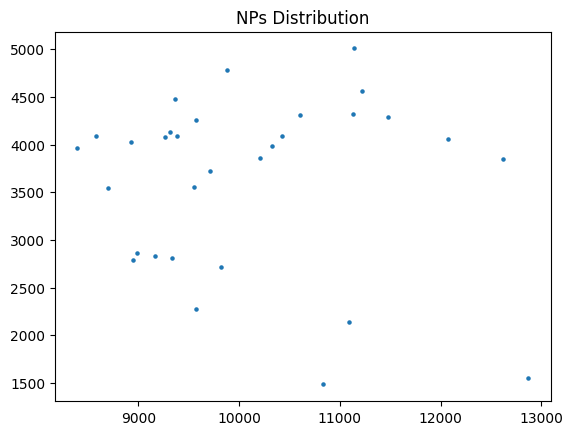

In [29]:
# rpAD_A1702073 (Less clusterable)
print('Number of objects =', len(dfs_NP['rpAD_A1702073'][['NP Centroid X']]))
x_NP_rpAD_A1702073 = dfs_NP['rpAD_A1702073'][['NP Centroid X']]
y_NP_rpAD_A1702073 = dfs_NP['rpAD_A1702073'][['NP Centroid Y']]
plt.title('NPs Distribution')
plt.scatter(x_NP_rpAD_A1702073, y_NP_rpAD_A1702073, s = 5);

Number of objects = 564


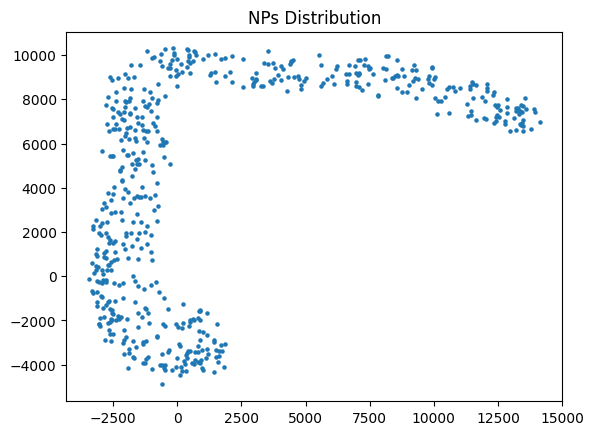

In [30]:
# cAD_A1800592 (Highly clusterable)
print('Number of objects =', len(dfs_NP['cAD_A1800592'][['NP Centroid X']]))
x_NP_cAD_A1800592 = dfs_NP['cAD_A1800592'][['NP Centroid X']]
y_NP_cAD_A1800592 = dfs_NP['cAD_A1800592'][['NP Centroid Y']]
plt.title('NPs Distribution')
plt.scatter(x_NP_cAD_A1800592, y_NP_cAD_A1800592, s = 5);

Number of objects = 136


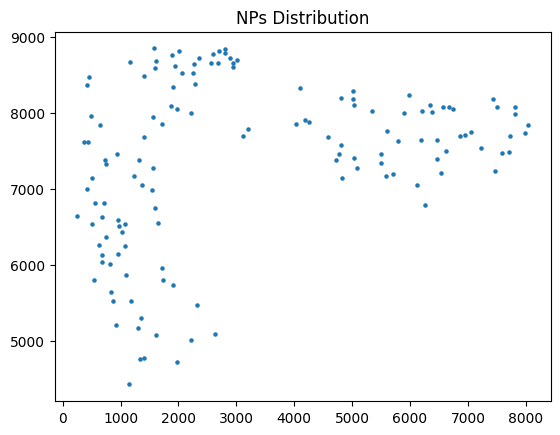

In [31]:
#rpAD_A1702076
print('Number of objects =', len(dfs_NP['rpAD_A1702076'][['NP Centroid X']]))
x_NP_rpAD_A1702076 = dfs_NP['rpAD_A1702076'][['NP Centroid X']]
y_NP_rpAD_A1702076 = dfs_NP['rpAD_A1702076'][['NP Centroid Y']]
plt.title('NPs Distribution')
plt.scatter(x_NP_rpAD_A1702076, y_NP_rpAD_A1702076, s = 5);

Number of objects = 471


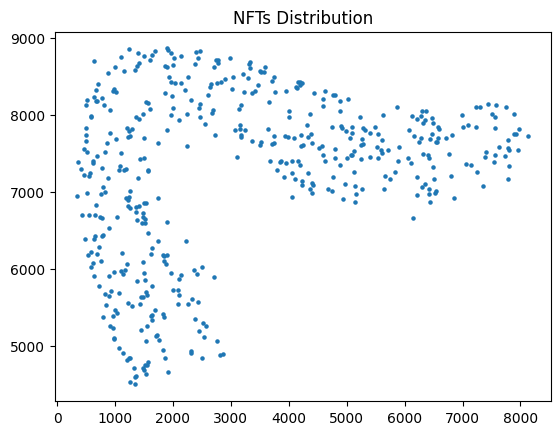

In [32]:
#rpAD_A1702076
print('Number of objects =', len(dfs_NFT['rpAD_A1702076'][['NFT Centroid X']]))
x_NFT_rpAD_A1702076 = dfs_NFT['rpAD_A1702076'][['NFT Centroid X']]
y_NFT_rpAD_A1702076 = dfs_NFT['rpAD_A1702076'][['NFT Centroid Y']]
plt.title('NFTs Distribution')
plt.scatter(x_NFT_rpAD_A1702076, y_NFT_rpAD_A1702076, s = 5);

In [33]:
# Create a dataframe that gather Hopkins scores for NP and NFT
df_Hopkins = pd.DataFrame(columns = ['NP Hopkins', 'NFT Hopkins'], index = names)
df_Hopkins['NP Hopkins'] = l_Hopkins_NP
df_Hopkins['NFT Hopkins'] = l_Hopkins_NFT
#df_Hopkins

/var/folders/1h/yccwb5h973vdm2f62l4gvj400000gn/T/ipykernel_33587/2802160208.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


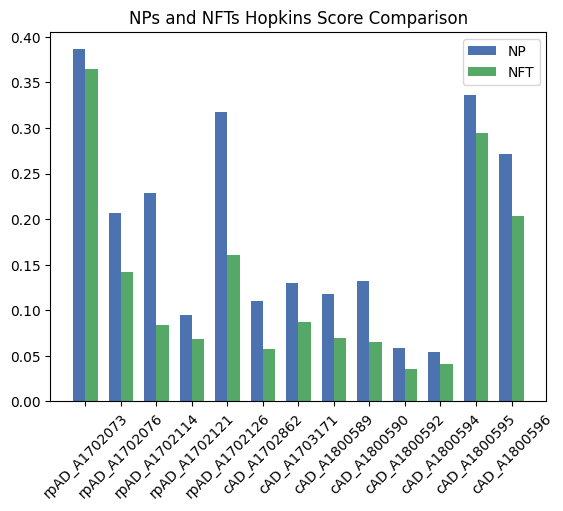

In [34]:
plt.style.use('seaborn-deep')

y_NP = df_Hopkins['NP Hopkins']
y_NFT = df_Hopkins['NFT Hopkins']
x = np.arange(len(df_Hopkins.index))  # Use a numeric range as x-values

bar_width = 0.35  # Width of the bars

plt.bar(x, y_NP, width=bar_width, label='NP')
plt.bar(x + bar_width, y_NFT, width=bar_width, label='NFT')  # Add the bar_width offset to align the NFT bars
plt.legend(loc='upper right')
plt.title('NPs and NFTs Hopkins Score Comparison')

# Set the x-axis tick labels to be the original index values
plt.xticks(x + bar_width/2, df_Hopkins.index, rotation=45)  # Add bar_width/2 offset to align the x-tick labels

plt.show()

## 4. K-Means

## NP

### Choose a slide to analyse:

In [35]:
dfs_NP.keys()

dict_keys(['rpAD_A1702073', 'rpAD_A1702076', 'rpAD_A1702114', 'rpAD_A1702121', 'rpAD_A1702126', 'cAD_A1702862', 'cAD_A1703171', 'cAD_A1800589', 'cAD_A1800590', 'cAD_A1800592', 'cAD_A1800594', 'cAD_A1800595', 'cAD_A1800596'])

In [167]:
slide_name = dfs_NP['cAD_A1800596']
#nom = 'rpAD_A1702073'

### Determine the optimal number of cluster to use:

In [168]:
#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
scaled_df = StandardScaler().fit_transform(slide_name)
#view first five rows of scaled DataFrame
print(scaled_df[:5])

[[-0.94743398  1.89181141]
 [-0.93720784  1.71017551]
 [-0.90117851  1.95766771]
 [-0.81021339  1.89606021]
 [-0.90866976  1.80364896]]


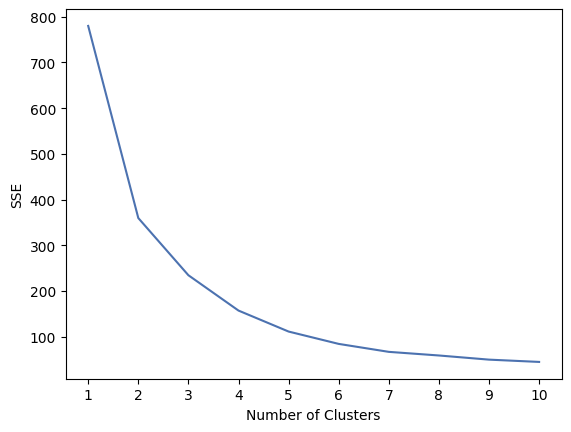

In [169]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### Perform K-Means Clustering with Optimal K:

In [170]:
optimal_k = 3

In [171]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=optimal_k, n_init=10, random_state=1)

#fit k-means algorithm to data
label = kmeans.fit(scaled_df)
y_kmeans = kmeans.predict(scaled_df)

#view cluster assignments for each observation
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [172]:
# Create a copy of our original dataset
df_NP_k_labels = slide_name.copy()

#append cluster assingments to new DataFrame
df_NP_k_labels['Cluster'] = kmeans.labels_

#df_NP_k_labels

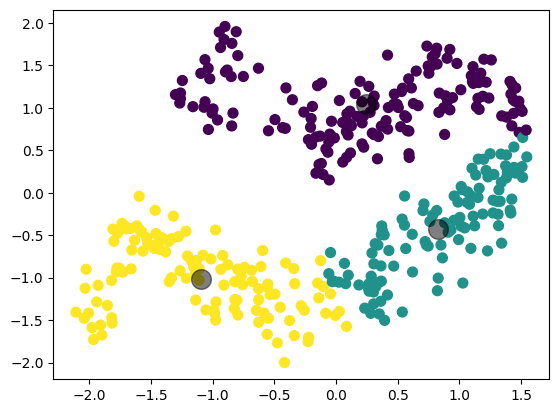

In [173]:
# Plot the clusters
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
#plt.savefig('./kmeans_graphs/kmeans_NP/NP_cAD_A1800596.png')


## 4.1 K-Means Metrics

### Silhouetter Score

In [62]:
score = silhouette_score(scaled_df, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.569


Range -1-1.<br>Negative values indicate wrong clusters.<br>Values around 0 represent borderline results.<br>Positive values, particularly those around 0.5 and above are good clusters.

### Davies-Bouldin Score

In [43]:
db_index = davies_bouldin_score(scaled_df, y_kmeans)
print('Davies-Bouldin Score: %.3f' % db_index)

Davies-Bouldin Score: 0.541


Baseline is 0, and the closer to 0 the better the cluster.

### Calinski Harabasz Score

In [44]:
ch_index = calinski_harabasz_score(scaled_df, y_kmeans)
print('Calinski Harabasz Score: %.3f' % ch_index)

Calinski Harabasz Score: 1566.749


The larger the CHI the better the cluster.

### Create datasets with coordinates and clusters

In [45]:
df_NP_kmeans_labels = pd.DataFrame(columns = ['Name', 'NP Centroid X', 'NP Centroid Y', 'Cluster'])
df_NP_kmeans_labels = df_NP_kmeans_labels.set_index('Name')
df_NP_kmeans_labels.head()

,NP Centroid X,NP Centroid Y,Cluster
Name,,,


In [46]:
# Set an optimal number of cluster
optimal_k = 3

In [47]:
for k in dfs_NP:
    # Iterate on slide name
    slide_name = dfs_NP[k]
    
    # Create temorary df
    temp_df = slide_name.copy()
    
    # Scale the data
    scaled_df = StandardScaler().fit_transform(slide_name)
    
    #instantiate the k-means class, using optimal number of clusters
    kmeans = KMeans(init="random", n_clusters=optimal_k, n_init=10, random_state=1)

    #fit k-means algorithm to data
    label = kmeans.fit(scaled_df)
    y_kmeans = kmeans.predict(scaled_df)
    
    #append cluster assingments to new DataFrame
    temp_df['Cluster'] = kmeans.labels_
    
    #df_NP_kmeans_labels = df_NP_kmeans_labels.append(temp_df)
    df_NP_kmeans_labels = pd.concat([df_NP_kmeans_labels, temp_df])

In [48]:
df_NP_kmeans_labels

,NP Centroid X,NP Centroid Y,Cluster
Name,,,
rpAD_A1702073,11140.435865,5007.713429,0
rpAD_A1702073,9362.589238,4481.327797,1
rpAD_A1702073,9876.612074,4777.696178,0
rpAD_A1702073,11222.714907,4558.737449,0
rpAD_A1702073,8579.168891,4090.298471,1
...,...,...,...
cAD_A1800596,5037.452870,4180.618827,2
cAD_A1800596,5251.997685,3892.654927,2
cAD_A1800596,5548.379181,4288.107656,2


## NFT

### Choose a slide to analyse:

In [49]:
dfs_NFT.keys()

dict_keys(['rpAD_A1702073', 'rpAD_A1702076', 'rpAD_A1702114', 'rpAD_A1702121', 'rpAD_A1702126', 'cAD_A1702862', 'cAD_A1703171', 'cAD_A1800589', 'cAD_A1800590', 'cAD_A1800592', 'cAD_A1800594', 'cAD_A1800595', 'cAD_A1800596'])

In [267]:
slide_name = dfs_NFT['cAD_A1800596']

### Determine the optimal number of cluster to use:

In [268]:
#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
scaled_df = StandardScaler().fit_transform(slide_name)
#view first five rows of scaled DataFrame
print(scaled_df[:5])

[[-0.82186046  1.73799007]
 [-0.6747357   1.85894207]
 [-0.73418556  1.80686076]
 [-0.51902071  1.96618845]
 [-0.61951279  1.94939908]]


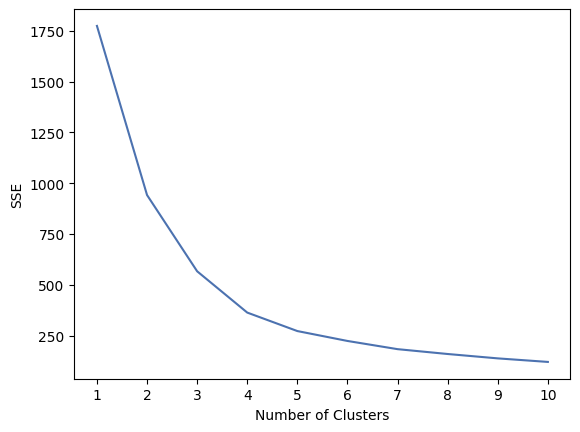

In [269]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### Perform K-Means Clustering with Optimal K:

In [270]:
optimal_k = 3

In [271]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=optimal_k, n_init=10, random_state=1)

#fit k-means algorithm to data
label = kmeans.fit(scaled_df)
y_kmeans = kmeans.predict(scaled_df)

#view cluster assignments for each observation
#kmeans.labels_

In [272]:
# Create a copy of our original dataset
df_NFT_k_labels = slide_name.copy()

#append cluster assingments to new DataFrame
df_NFT_k_labels['Cluster'] = kmeans.labels_

#df_NFT_k_labels

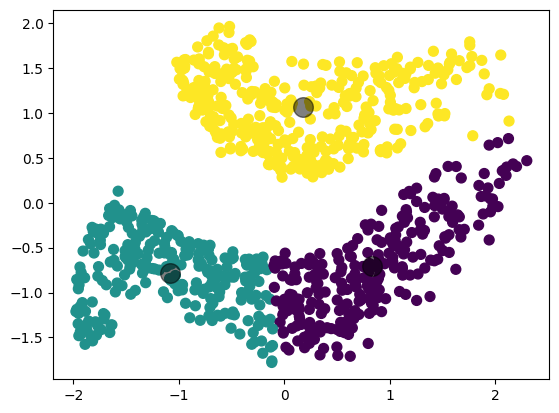

In [273]:
# Plot the clusters
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.savefig('./kmeans_graphs/kmeans_NFT/NFT_cAD_A1800596.png')

### Create datasets with coordinates and clusters

In [57]:
df_NFT_kmeans_labels = pd.DataFrame(columns = ['Name', 'NFT Centroid X', 'NFT Centroid Y', 'Cluster'])
df_NFT_kmeans_labels = df_NFT_kmeans_labels.set_index('Name')
df_NFT_kmeans_labels.head()

,NFT Centroid X,NFT Centroid Y,Cluster
Name,,,


In [58]:
for k in dfs_NFT:
    # Iterate on slide name
    slide_name = dfs_NFT[k]
    
    # Create temorary df
    temp_df = slide_name.copy()
    
    # Scale the data
    scaled_df = StandardScaler().fit_transform(slide_name)
    
    #instantiate the k-means class, using optimal number of clusters
    kmeans = KMeans(init="random", n_clusters=optimal_k, n_init=10, random_state=1)

    #fit k-means algorithm to data
    label = kmeans.fit(scaled_df)
    y_kmeans = kmeans.predict(scaled_df)
    
    #append cluster assingments to new DataFrame
    temp_df['Cluster'] = kmeans.labels_
    
    # Put all labels in a dataframe
    df_NFT_kmeans_labels = pd.concat([df_NFT_kmeans_labels, temp_df])

In [59]:
df_NFT_kmeans_labels

,NFT Centroid X,NFT Centroid Y,Cluster
Name,,,
rpAD_A1702073,13108.939843,7890.448858,0
rpAD_A1702073,14169.277829,7886.467790,0
rpAD_A1702073,14194.050013,6989.400512,0
rpAD_A1702073,13047.009381,6753.632830,0
rpAD_A1702073,14525.377986,6151.164570,0
...,...,...,...
cAD_A1800596,7408.504842,4323.494925,0
cAD_A1800596,7050.192884,4143.019854,0
cAD_A1800596,7078.946312,4020.933777,0


### K-Means Loop NPs

In [60]:
# Create the dataset
df_NP_kmeans_global = pd.DataFrame(columns = ['Name', 'Silhouetter', 'Davies-Bouldin', 'Calinski Harabasz'])
df_NP_kmeans_global['Name'] = dfs_NP.keys()
df_NP_kmeans_global = df_NP_kmeans_global.set_index('Name')
#df_NP_kmeans_global.head()

In [61]:
for k, n in zip(dfs_NP, df_NP_kmeans_global.index.values):
    slide_name = dfs_NP[k]
    #create scaled DataFrame where each variable has mean of 0 and standard dev of 1
    scaled_df = StandardScaler().fit_transform(slide_name)
    
    #initialize kmeans parameters
    kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 1,
    }
    
    #create list to hold SSE values for each k
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_df)
        sse.append(kmeans.inertia_)
        
    #instantiate the k-means class, using optimal number of clusters
    kmeans = KMeans(init="random", n_clusters=optimal_k, n_init=10, random_state=1)

    #fit k-means algorithm to data
    label = kmeans.fit(scaled_df)
    y_kmeans = kmeans.predict(scaled_df)
    
    # Silhouette Score
    silhouette_s = silhouette_score(scaled_df, kmeans.labels_, metric='euclidean')
    df_NP_kmeans_global.loc[n, 'Silhouetter'] = silhouette_s
    
    # Davies Bouldin Score
    db_index = davies_bouldin_score(scaled_df, y_kmeans)
    df_NP_kmeans_global.loc[n, 'Davies-Bouldin'] = db_index
    
    # Calinski Harabasz Score
    ch_index = calinski_harabasz_score(scaled_df, y_kmeans)
    df_NP_kmeans_global.loc[n, 'Calinski Harabasz'] = ch_index


In [62]:
df_NP_kmeans_global

,Silhouetter,Davies-Bouldin,Calinski Harabasz
Name,,,
rpAD_A1702073,0.438305,0.73705,28.67016
rpAD_A1702076,0.568783,0.580985,274.583043
rpAD_A1702114,0.498511,0.656534,140.142002
rpAD_A1702121,0.536002,0.619979,516.434179
rpAD_A1702126,0.454576,0.755029,39.163989
cAD_A1702862,0.690518,0.430874,547.974014
cAD_A1703171,0.508047,0.705047,1180.820584
cAD_A1800589,0.425812,0.821783,402.695306
cAD_A1800590,0.561165,0.592132,1103.549737


In [63]:
df_NP_kmeans_global.std()

Silhouetter            0.074636
Davies-Bouldin         0.117375
Calinski Harabasz    758.471074
dtype: float64

In [64]:
df_NP_kmeans_global.mean()

Silhouetter            0.524461
Davies-Bouldin         0.663634
Calinski Harabasz    685.774163
dtype: float64

### K-Means Loop NFTs

In [65]:
# Create the dataset
df_NFT_kmeans_global = pd.DataFrame(columns = ['Name', 'Silhouetter', 'Davies-Bouldin', 'Calinski Harabasz'])
df_NFT_kmeans_global['Name'] = dfs_NFT.keys()
df_NFT_kmeans_global = df_NFT_kmeans_global.set_index('Name')
#df_NFT_kmeans_global.head()

In [66]:
for k, n in zip(dfs_NFT, df_NFT_kmeans_global.index.values):
    slide_name = dfs_NFT[k]
    
    # Create scaled DataFrame where each variable has mean of 0 and standard dev of 1
    scaled_df = StandardScaler().fit_transform(slide_name)
    
    # Initialize kmeans parameters
    kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 1,
    }
    
    # Create list to hold SSE values for each k
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_df)
        sse.append(kmeans.inertia_)
        
    # Instantiate the k-means class, using optimal number of clusters
    kmeans = KMeans(init="random", n_clusters=optimal_k, n_init=10, random_state=1)

    # Fit k-means algorithm to data
    label = kmeans.fit(scaled_df)
    y_kmeans = kmeans.predict(scaled_df)
    
    # Silhouette Score
    silhouette_s = silhouette_score(scaled_df, kmeans.labels_, metric='euclidean')
    df_NFT_kmeans_global.loc[n, 'Silhouetter'] = silhouette_s
    
    # Davies Bouldin Score
    db_index = davies_bouldin_score(scaled_df, y_kmeans)
    df_NFT_kmeans_global.loc[n, 'Davies-Bouldin'] = db_index
    
    # Calinski Harabasz Score
    ch_index = calinski_harabasz_score(scaled_df, y_kmeans)
    df_NFT_kmeans_global.loc[n, 'Calinski Harabasz'] = ch_index


In [67]:
df_NFT_kmeans_global

,Silhouetter,Davies-Bouldin,Calinski Harabasz
Name,,,
rpAD_A1702073,0.62902,0.497487,79.504495
rpAD_A1702076,0.525637,0.650375,813.685816
rpAD_A1702114,0.520166,0.658546,2732.325649
rpAD_A1702121,0.531486,0.625535,1701.676809
rpAD_A1702126,0.44454,0.791212,373.805469
cAD_A1702862,0.58927,0.530104,2596.467216
cAD_A1703171,0.524461,0.664745,2924.115048
cAD_A1800589,0.49022,0.767246,2670.704401
cAD_A1800590,0.527339,0.751641,5287.957132


In [68]:
df_NFT_kmeans_global.mean()

Silhouetter             0.517533
Davies-Bouldin          0.669144
Calinski Harabasz    1980.577154
dtype: float64

In [69]:
df_NFT_kmeans_global.std()

Silhouetter             0.059298
Davies-Bouldin          0.092720
Calinski Harabasz    1504.638662
dtype: float64

## 5. K-Nearest Neighbors

### Pre-process data

In [70]:
# Features and labels
X = df_NP_kmeans_labels.drop('Cluster', axis=1)
y = df_NP_kmeans_labels['Cluster'].astype('int')

### Split Dataset

In [71]:
# Split dataset into training and testing data (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

### Algorithm

In [72]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
preds = clf.predict(X_test.values)

# Calculate test set accuracy
def accuracy(preds, y_test):
    return 100 * (preds == y_test).mean()
print(f'Sklearn accuracy: {accuracy(preds, y_test):.3f} %')

Sklearn accuracy: 74.948 %


/Users/mathildeoukaci/miniconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## 6. Aglomerative

In [73]:
dfs_NP.keys()

dict_keys(['rpAD_A1702073', 'rpAD_A1702076', 'rpAD_A1702114', 'rpAD_A1702121', 'rpAD_A1702126', 'cAD_A1702862', 'cAD_A1703171', 'cAD_A1800589', 'cAD_A1800590', 'cAD_A1800592', 'cAD_A1800594', 'cAD_A1800595', 'cAD_A1800596'])

In [74]:
X = dfs_NP['rpAD_A1702121']
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit_predict(X)

/Users/mathildeoukaci/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [75]:
# Create a copy of our original dataset
df_NP_agglomerative_labels = dfs_NP['rpAD_A1702121'].copy()

#append cluster assingments to new DataFrame
df_NP_agglomerative_labels['Cluster'] = model.labels_

#df_NP_agglomerative_labels

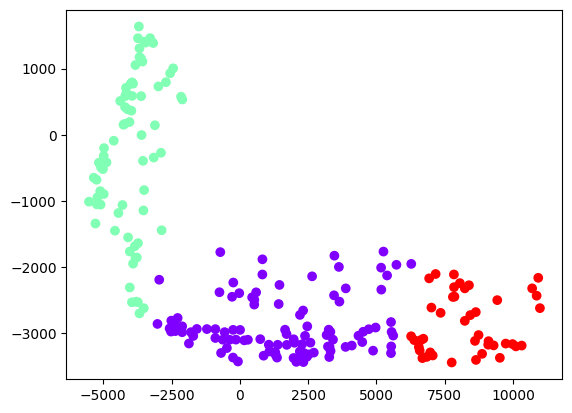

In [76]:
#pring the data points
plt.scatter(x=df_NP_agglomerative_labels['NP Centroid X'], y=df_NP_agglomerative_labels['NP Centroid Y'], c= model.labels_, cmap='rainbow' )

# Variables extraction

## (1) Centroids

In [77]:
df = df_NFT_kmeans_labels.copy()

# Create a dictionary to store the separate datasets
datasets = {}

# Iterate over unique index values and create separate datasets
for index_value in df.index.unique():
    datasets[f"df_{index_value}"] = df.loc[[index_value]].copy()

# Calculate the centroids for each dataset
for dataset in datasets.values():
    dataset['Centroid'] = (dataset['NFT Centroid X'] + dataset['NFT Centroid Y']) / 2

# Concatenate the datasets into a single DataFrame
result_df = pd.concat(datasets.values())
result_df.drop(['Cluster'], axis=1, inplace=True)

# Print the result DataFrame
result_df

,NFT Centroid X,NFT Centroid Y,Centroid
Name,,,
rpAD_A1702073,13108.939843,7890.448858,10499.694350
rpAD_A1702073,14169.277829,7886.467790,11027.872809
rpAD_A1702073,14194.050013,6989.400512,10591.725263
rpAD_A1702073,13047.009381,6753.632830,9900.321106
rpAD_A1702073,14525.377986,6151.164570,10338.271278
...,...,...,...
cAD_A1800596,7408.504842,4323.494925,5865.999883
cAD_A1800596,7050.192884,4143.019854,5596.606369
cAD_A1800596,7078.946312,4020.933777,5549.940044


In [78]:
#result_df.to_csv('centroids.csv')

## (2) Number of data points per clusters

In [79]:
df = df_NFT_kmeans_labels.copy()

# Create a dictionary to store the separate datasets
datasets = {}

# Iterate over unique index values and create separate datasets
for index_value in df.index.unique():
    datasets[f"df_{index_value}"] = df.loc[[index_value]]

# Create a new DataFrame to store the counts
count_df = pd.DataFrame(index=datasets.keys())

# Iterate over the datasets and count the occurrences of each value in 'Cluster'
for dataset_name, dataset in datasets.items():
    counts = dataset['Cluster'].value_counts()
    for value, count in counts.items():
        column_name = f"Cluster{value}"
        count_df.loc[dataset_name, column_name] = count

# Fill missing values with 0
count_df = count_df.fillna(0)

# Print the count DataFrame
count_df

,Cluster2,Cluster0,Cluster1
df_rpAD_A1702073,29.0,8.0,8.0
df_rpAD_A1702076,141.0,178.0,152.0
df_rpAD_A1702114,645.0,671.0,432.0
df_rpAD_A1702121,357.0,141.0,293.0
df_rpAD_A1702126,65.0,139.0,137.0
df_cAD_A1702862,309.0,491.0,152.0
df_cAD_A1703171,682.0,476.0,607.0
df_cAD_A1800589,421.0,443.0,290.0
df_cAD_A1800590,945.0,1350.0,1820.0
df_cAD_A1800592,677.0,749.0,258.0


In [80]:
#count_df.to_csv('number_of_point_per_cluster.csv')

## (3) Spread/Dispersion

In [81]:
df = df_NFT_kmeans_labels.copy()

# Create a dictionary to store the separate datasets
datasets = {}

# Iterate over unique index values and create separate datasets
for index_value in df.index.unique():
    datasets[f"df_{index_value}"] = df.loc[[index_value]].copy()

# Create a new dataset with 'Name' as the index and 'std' column
new_data = {'Name': [], 'std': []}

# Calculate the centroids for each dataset and the standard deviation of centroids
for dataset_name, dataset in datasets.items():
    dataset['Centroid'] = (dataset['NFT Centroid X'] + dataset['NFT Centroid Y']) / 2
    centroid_std = np.std(dataset['Centroid'])
    dataset['Centroid Std'] = centroid_std
    
    # Append the dataset name and centroid standard deviation to the new dataset
    new_data['Name'].append(dataset_name)
    new_data['std'].append(centroid_std)

# Create the new dataset
df_new = pd.DataFrame(new_data).set_index('Name')

# Add to count_df
count_df['Global std'] = df_new['std']

# Print the new dataset
count_df

,Cluster2,Cluster0,Cluster1,Global std
df_rpAD_A1702073,29.0,8.0,8.0,1301.543106
df_rpAD_A1702076,141.0,178.0,152.0,1360.986971
df_rpAD_A1702114,645.0,671.0,432.0,2099.704566
df_rpAD_A1702121,357.0,141.0,293.0,2115.670145
df_rpAD_A1702126,65.0,139.0,137.0,2603.610738
df_cAD_A1702862,309.0,491.0,152.0,2083.340886
df_cAD_A1703171,682.0,476.0,607.0,2269.084271
df_cAD_A1800589,421.0,443.0,290.0,1859.224099
df_cAD_A1800590,945.0,1350.0,1820.0,3403.631486
df_cAD_A1800592,677.0,749.0,258.0,3351.519369


In [82]:
#count_df.to_csv('number_of_point-global_std.csv')

## Max/min distance for each cluster

**Max**

In [83]:
df_max_distance = result_df.copy()
#df_max_distance['Centroid'] = result_df['Centroid']
df_max_distance['Cluster'] = df_NFT_kmeans_labels['Cluster']
df_max_distance

,NFT Centroid X,NFT Centroid Y,Centroid,Cluster
Name,,,,
rpAD_A1702073,13108.939843,7890.448858,10499.694350,0
rpAD_A1702073,14169.277829,7886.467790,11027.872809,0
rpAD_A1702073,14194.050013,6989.400512,10591.725263,0
rpAD_A1702073,13047.009381,6753.632830,9900.321106,0
rpAD_A1702073,14525.377986,6151.164570,10338.271278,0
...,...,...,...,...
cAD_A1800596,7408.504842,4323.494925,5865.999883,0
cAD_A1800596,7050.192884,4143.019854,5596.606369,0
cAD_A1800596,7078.946312,4020.933777,5549.940044,0


In [84]:
from scipy.spatial import distance

df = df_max_distance.copy()

# Group the dataset by 'Name' and calculate the maximum distance for each cluster
grouped = df.groupby(['Name', 'Cluster'])
max_distances = grouped.apply(
    lambda x: np.max(distance.pdist(x[['NFT Centroid X', 'NFT Centroid Y']]))
)

# Reshape the max_distances series to a dataframe
df_max_distances = max_distances.unstack(level='Cluster')

# Rename the columns to include 'Cluster' prefix
df_max_distances.columns = ['Cluster' + str(col) for col in df_max_distances.columns]

# Reset the index to make 'Name' a column
df_max_distances = df_max_distances.reset_index()

# Set 'Name' as the index
df_max_distances.set_index('Name', inplace=True)

# Print the new dataset
print(df_max_distances)

                   Cluster0      Cluster1      Cluster2
Name                                                   
cAD_A1702862    5409.275447   5271.341176   6114.981179
cAD_A1703171    5239.846999   6655.939850   5967.967235
cAD_A1800589    5668.988986   6350.861552   7597.920379
cAD_A1800590    8612.380323  12890.497464  15686.660655
cAD_A1800592    8535.705551  11632.368792   9038.262775
cAD_A1800594    5949.316903  11744.122342  10094.840850
cAD_A1800595    1524.972340   4142.510623   4348.174755
cAD_A1800596    7974.236019   6115.078668  10249.976464
rpAD_A1702073   3016.421534   4849.209948   4493.601548
rpAD_A1702076   4476.215215   3697.625587   3242.428413
rpAD_A1702114   7860.893072   4585.307168   7777.169927
rpAD_A1702121   4192.462678   8292.196115   8959.438519
rpAD_A1702126  10258.228973   7171.965410   3418.260396


In [85]:
#df_max_distances.to_csv('max_distances_per_cluster.csv')

**Min**

In [86]:
df_min_distance = result_df.copy()
#df_max_distance['Centroid'] = result_df['Centroid']
df_min_distance['Cluster'] = df_NFT_kmeans_labels['Cluster']
df_min_distance

,NFT Centroid X,NFT Centroid Y,Centroid,Cluster
Name,,,,
rpAD_A1702073,13108.939843,7890.448858,10499.694350,0
rpAD_A1702073,14169.277829,7886.467790,11027.872809,0
rpAD_A1702073,14194.050013,6989.400512,10591.725263,0
rpAD_A1702073,13047.009381,6753.632830,9900.321106,0
rpAD_A1702073,14525.377986,6151.164570,10338.271278,0
...,...,...,...,...
cAD_A1800596,7408.504842,4323.494925,5865.999883,0
cAD_A1800596,7050.192884,4143.019854,5596.606369,0
cAD_A1800596,7078.946312,4020.933777,5549.940044,0


In [87]:
df = df_min_distance.copy()

# Group the dataset by 'Name' and calculate the minimum distance for each cluster
grouped = df.groupby(['Name', 'Cluster'])
min_distances = grouped.apply(
    lambda x: np.min(distance.pdist(x[['NFT Centroid X', 'NFT Centroid Y']]))
)

# Reshape the min_distances series to a dataframe
df_min_distances = min_distances.unstack(level='Cluster')

# Rename the columns to include 'Cluster' prefix
df_min_distances.columns = ['Cluster' + str(col) for col in df_min_distances.columns]

# Reset the index to make 'Name' a column
df_min_distances = df_min_distances.reset_index()

# Set 'Name' as the index
df_min_distances.set_index('Name', inplace=True)

# Print the new dataset
print(df_min_distances)

                  Cluster0    Cluster1   Cluster2
Name                                             
cAD_A1702862     17.178140   26.511899  14.968072
cAD_A1703171     13.680445   13.914528  12.083155
cAD_A1800589     14.113555   14.704403  15.949531
cAD_A1800590     10.364566   13.482669  12.651456
cAD_A1800592     13.847950   14.161857  13.137144
cAD_A1800594     13.453288   10.952074  17.616232
cAD_A1800595   1524.972340  203.316875  35.833558
cAD_A1800596     18.313421   14.265686  15.557620
rpAD_A1702073   394.647542  504.906688  43.801884
rpAD_A1702076    14.704403   16.622263  17.831739
rpAD_A1702114    13.062617   15.482369  12.322666
rpAD_A1702121    13.270602   17.274687  16.815022
rpAD_A1702126    19.880861   15.481930  20.043246


In [88]:
#df_min_distances.to_csv('min_distances_per_cluster.csv')

## Area of clusters

/Users/mathildeoukaci/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


rpAD_A1702073


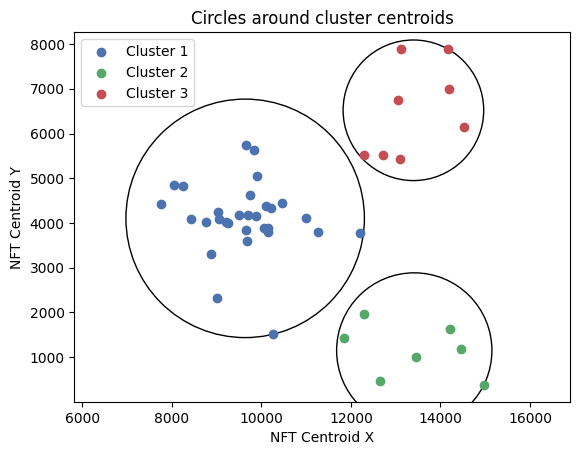

/Users/mathildeoukaci/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


rpAD_A1702076


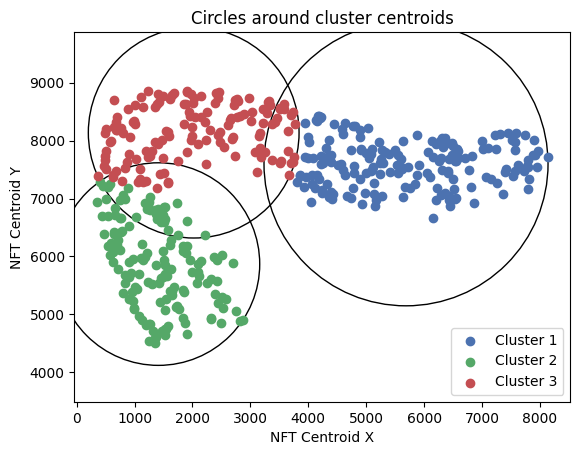

/Users/mathildeoukaci/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


rpAD_A1702114


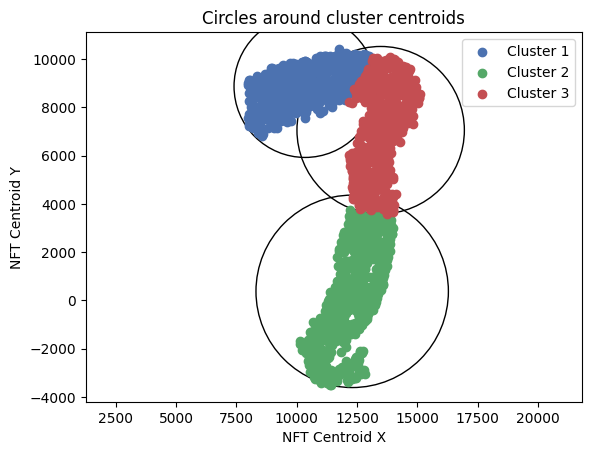

/Users/mathildeoukaci/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


rpAD_A1702121


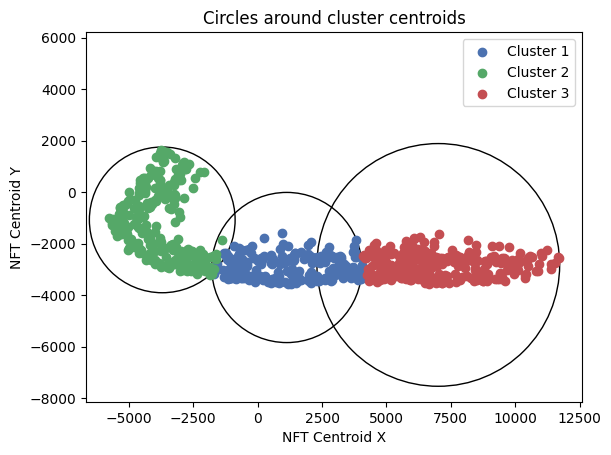

/Users/mathildeoukaci/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


rpAD_A1702126


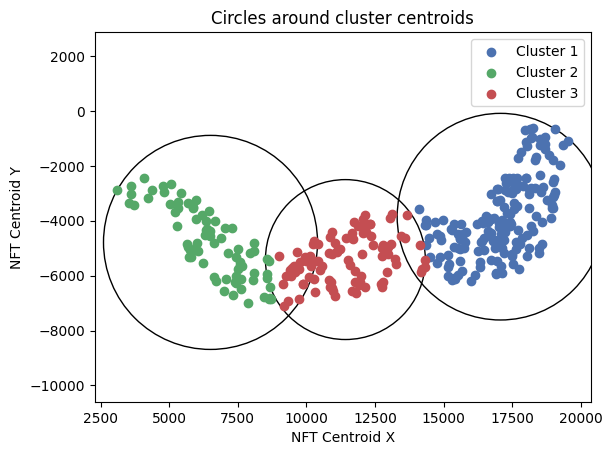

/Users/mathildeoukaci/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cAD_A1702862


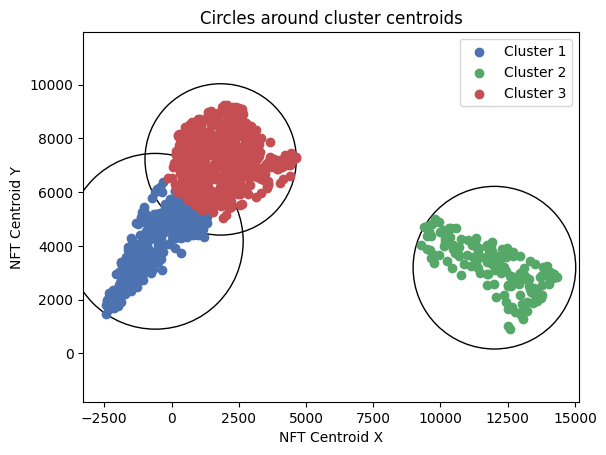

/Users/mathildeoukaci/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cAD_A1703171


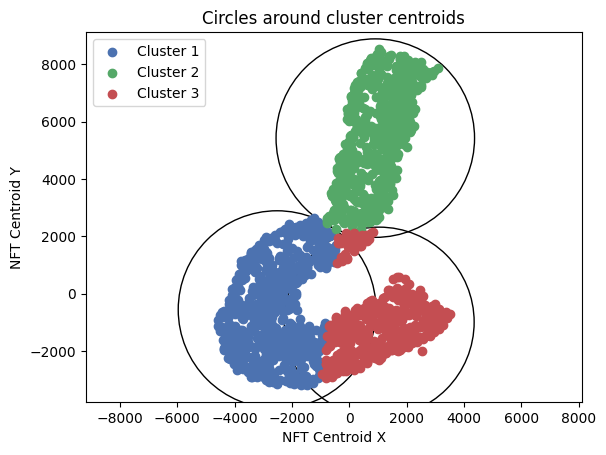

/Users/mathildeoukaci/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cAD_A1800589


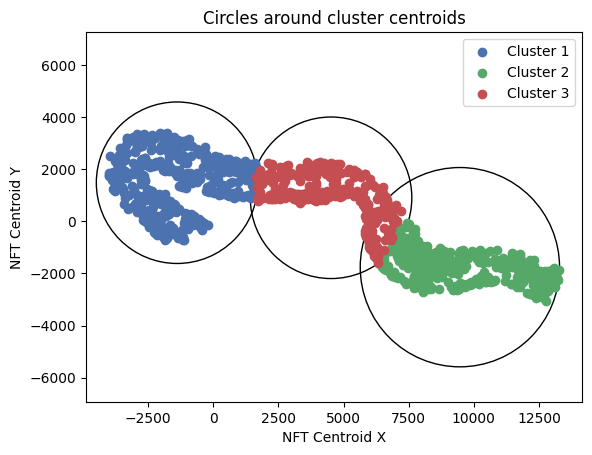

/Users/mathildeoukaci/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cAD_A1800590


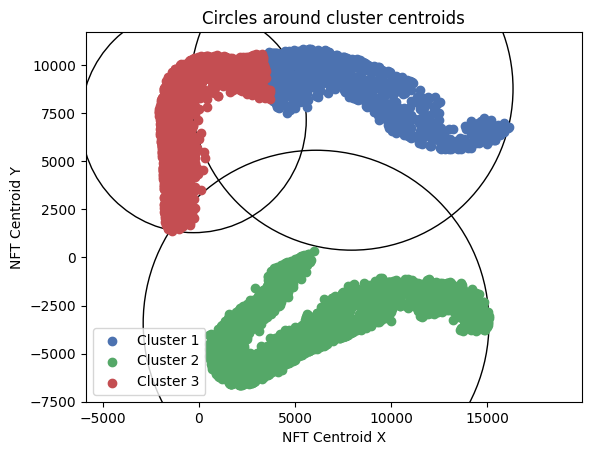

/Users/mathildeoukaci/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cAD_A1800592


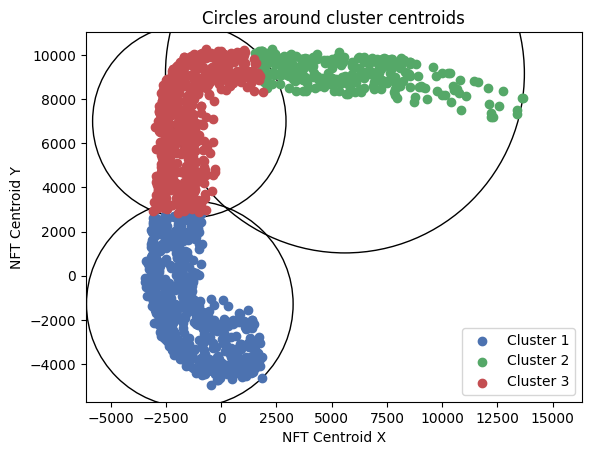

/Users/mathildeoukaci/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cAD_A1800594


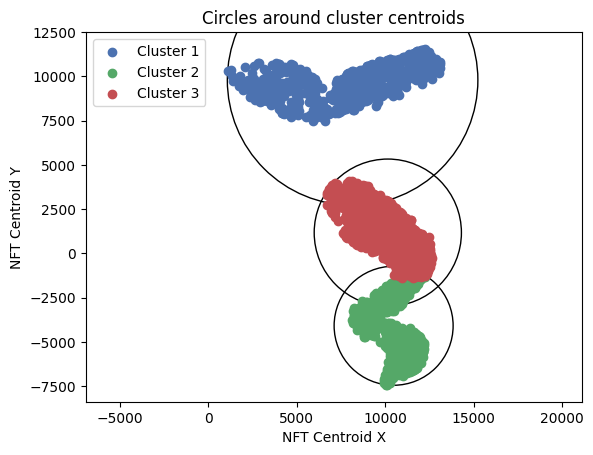

/Users/mathildeoukaci/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cAD_A1800595


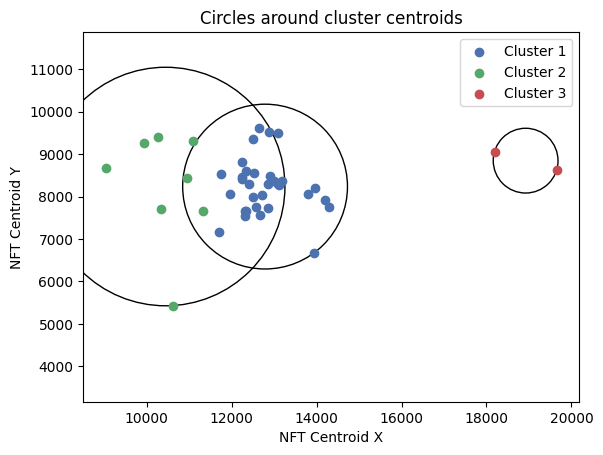

/Users/mathildeoukaci/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cAD_A1800596


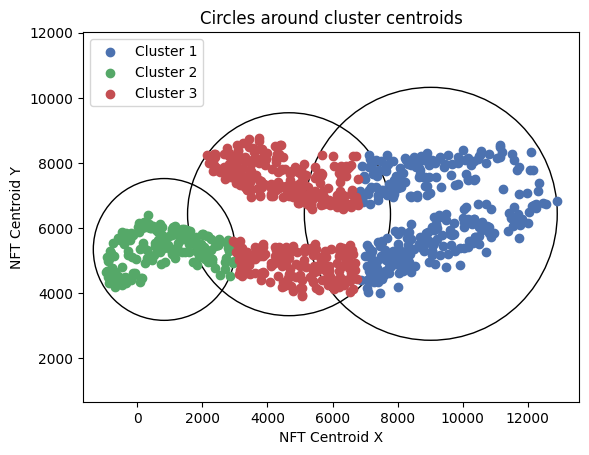

In [111]:
# Create an empty DataFrame to store the areas
areas_df = pd.DataFrame(index=dfs_NFT.keys(), columns=['Cluster0', 'Cluster1', 'Cluster2'])

for k in dfs_NFT:
    # Iterate on slide name
    slide_name = dfs_NFT[k]
    
    # Create temporary df
    temp_df = slide_name.copy()

    # Execution of K-means with 2 clusters
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(temp_df)

    # Coordinates of centroids
    centroids = kmeans.cluster_centers_

    # Calculation of maximum distances between points of each cluster and its centroid
    max_distances = []
    for i in range(kmeans.n_clusters):
        distances = np.linalg.norm(temp_df[kmeans.labels_ == i] - centroids[i], axis=1)
        max_distance = np.max(distances)
        max_distances.append(max_distance)

    # Calculation of areas and updating the areas_df DataFrame
    for i in range(kmeans.n_clusters):
        area = np.pi * (max_distances[i] ** 2)
        areas_df.at[k, f'Cluster{i}'] = area

    # Plotting circles around centroids
    fig, ax = plt.subplots()
    for i in range(kmeans.n_clusters):
        circle = plt.Circle(centroids[i], max_distances[i], edgecolor='black', facecolor='none')
        ax.add_artist(circle)

    # Displaying points and clusters
    for i in range(kmeans.n_clusters):
        cluster_points = temp_df[kmeans.labels_ == i]
        plt.scatter(cluster_points['NFT Centroid X'], cluster_points['NFT Centroid Y'], label=f"Cluster {i+1}")

    # Display settings
    print(k)
    plt.xlabel('NFT Centroid X')
    plt.ylabel('NFT Centroid Y')
    plt.title('Circles around cluster centroids')
    plt.legend()

    # Display the graph
    plt.axis('equal')
    plt.show()
    plt.close()

# Print the areas DataFrame
#print(areas_df)


In [109]:
areas_df

,Cluster0,Cluster1,Cluster2
rpAD_A1702073,7754721.306168,22311359.13383,9459281.178102
rpAD_A1702076,9606211.342387,18883714.113779,10394377.712326
rpAD_A1702114,37784501.010917,49917597.480503,27227660.684322
rpAD_A1702121,26715477.564021,25164496.180588,69789454.542334
rpAD_A1702126,26645047.956883,47739029.87401,44488479.966649
cAD_A1702862,33264445.032339,28723704.588383,24968011.947672
cAD_A1703171,34455739.25719,37656840.606629,37372264.491675
cAD_A1800589,30323410.75859,30148674.424224,46078179.380931
cAD_A1800590,219419598.372209,254278876.376939,108695004.87447
cAD_A1800592,60216622.882423,68734734.656718,207336586.877276


In [91]:
df = df_max_distance.copy()

# Create sub datasets for each different 'Name'
datasets = {}
for name, group in df.groupby('Name'):
    datasets[name] = group.copy()

# Calculate the maximum distance for each cluster in each dataset
for name, dataset in datasets.items():
    cluster_distances = {}
    for cluster, group in dataset.groupby('Cluster'):
        cluster_distances[cluster] = np.max(distance.cdist(group[['NFT Centroid X', 'NFT Centroid Y']],
                                                           group[['NFT Centroid X', 'NFT Centroid Y']]))
    max_distances = pd.Series(cluster_distances, name='Max Distance')
    dataset = pd.concat([dataset.reset_index(drop=True), max_distances], axis=1)

    # Print the dataset for the current 'Name' with the maximum distances for each cluster
    print(f"Dataset: {name}")
    print(dataset)

Dataset: cAD_A1702862
     NFT Centroid X  NFT Centroid Y     Centroid Cluster  Max Distance
0       1482.246796     9015.309342  5248.778069       0   5409.275447
1       1356.174068     8963.555460  5159.864764       0   5271.341176
2       1479.592633     8927.725849  5203.659241       0   6114.981179
3       1720.679076     8922.860099  5321.769588       0           NaN
4       1356.174068     8917.994350  5137.084209       0           NaN
..              ...             ...          ...     ...           ...
947    13068.109248     1492.860455  7280.484852       1           NaN
948    12979.637159     1441.106573  7210.371866       1           NaN
949    13080.937701     1296.461108  7188.699404       1           NaN
950    12496.579551     1005.400813  6750.990182       1           NaN
951    12601.861337      920.029025  6760.945181       1           NaN

[952 rows x 5 columns]
Dataset: cAD_A1703171
      NFT Centroid X  NFT Centroid Y     Centroid Cluster  Max Distance
0       

## (7) K-means scores

In [108]:
#df_NFT_kmeans_global.to_csv('k-means_scores.csv')





- relation avec roi globale (y compris les points bleus)
- distribution figure : comparer plutot par groupes
- 

- ACP par groupes